In [1]:
#References Used 
# https://datascienceplus.com/linear-regression-from-scratch-in-python/

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import string

### Linear Regression Implementation

In [3]:
diabetes = load_diabetes() #Loading the diabetes dataset
data = diabetes.data 
target = diabetes.target
featureLength = len(diabetes.feature_names)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2) #Splitting the dataset into train & test

In [5]:
print("X_train : " , X_train.shape, " |  y_train : " , y_train.shape)

X_train :  (353, 10)  |  y_train :  (353,)


In [6]:
print("X_test : " , X_test.shape, " |  y_test : " , y_test.shape)

X_test :  (89, 10)  |  y_test :  (89,)


In [7]:
xi_vals = X_train[:,0] #First column of the dataset
yi_vals = y_train #Target Values 

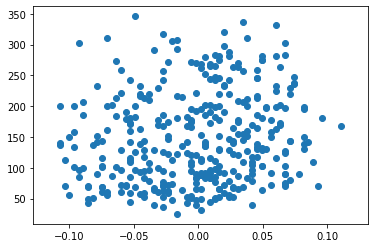

In [8]:
plt.scatter(X_train[:,0],yi_vals) #Scatter plot of targets against the dataset

In [9]:
ones = np.ones(shape=y_train.shape)[..., None] #Creating an array of 1's
X = np.concatenate((ones, X_train), 1) #Concatenating the array of 1's to the X values

In [10]:
XTX = X.T @ X #The coefficient matrix of Normal Eq's
XTy = X.T @ yi_vals #Right hand side of Normal Eq's

In [11]:
XTX

array([[ 3.53000000e+02, -7.15207373e-01, -2.21051582e-01,
        -1.59026051e-01, -7.39339605e-01, -4.97428749e-01,
        -2.42246195e-01,  2.36262026e-01, -6.58605695e-01,
        -6.00479078e-01, -8.65053727e-01],
       [-7.15207373e-01,  8.14934183e-01,  1.43267833e-01,
         1.62175369e-01,  2.25927207e-01,  1.94101488e-01,
         1.64615092e-01, -3.85324063e-02,  1.35323587e-01,
         1.99879931e-01,  2.35352864e-01],
       [-2.21051582e-01,  1.43267833e-01,  7.97307718e-01,
         1.00638803e-01,  2.02301412e-01,  4.55700047e-02,
         1.31291311e-01, -3.09379434e-01,  2.89622388e-01,
         1.27029615e-01,  1.70329918e-01],
       [-1.59026051e-01,  1.62175369e-01,  1.00638803e-01,
         7.63809520e-01,  3.29601927e-01,  2.14905957e-01,
         2.31637463e-01, -2.98472596e-01,  3.45126728e-01,
         3.60325795e-01,  3.02147287e-01],
       [-7.39339605e-01,  2.25927207e-01,  2.02301412e-01,
         3.29601927e-01,  8.02119393e-01,  1.68969043e-01,
  

In [12]:
XTy

array([52431.        ,    91.45831903,    56.73650076,   690.48044364,
         439.34952223,   150.37709717,   164.11834752,  -431.10810474,
         395.33947809,   562.2808876 ,   332.62547647])

In [13]:
beta = np.linalg.solve(XTX,XTy) #Solving for beta

In [14]:
beta #Predicted beta values 

array([  150.02452131,   -40.4500029 ,  -214.83126351,   496.57853575,
         331.75676239, -1038.81027957,   660.44624355,   196.08005316,
         184.71023101,   816.03262464,    82.34536986])

In [15]:
def get_predictions(beta_values, x_values):
    beta_0 = beta[0]
    length = len(beta_values)
    
    for i in range(1,length):
        result = beta_0 + beta[i]*xi_vals
        
    return result

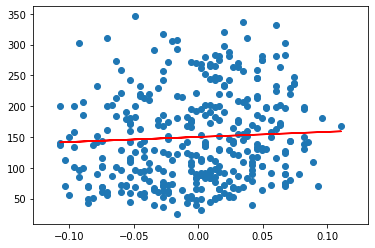

In [16]:
#yi_vals_pred = beta[0] + beta[1]*xi_vals + beta[2]*xi_vals + beta[3]*xi_vals + beta[4]*xi_vals + beta[5]*xi_vals + beta[6]*xi_vals + beta[7]*xi_vals + beta[8]*xi_vals + beta[9]*xi_vals  #Predicted Values 
y_pred = get_predictions(beta,X_test) #Using the test set to make new predictions
plt.scatter(xi_vals,yi_vals) 
plt.plot(xi_vals, y_pred, color = 'red')

### Logistic Regression (Classification) Implementation

In [142]:
data_dir = '/Users/ksivanathan/Desktop/USF/Stat_Learning/Project1_MATH373/'
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
y = df_train['Survived'].values
df_out = pd.DataFrame(df_test['PassengerId'])

In [143]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [144]:
#Code taken from previous homework
median_age = df_train['Age'].median()
mean_fare = df_train['Fare'].mean()

title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if (str.find(big_string, substring) != -1):
            return substring
    print(big_string)
    return np.nan


def replace_titles(x):
    
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
    
def preprocess(df): 
    df = df[['Age','Pclass','Sex','SibSp','Parch','Fare','Name','Embarked']] 
    
    #Filling null values by imputing them
    df['Age'].fillna(median_age, inplace = True)
    df['Fare'].fillna(mean_fare, inplace = True)
    
    #Replacing titles with Mr, Mrs, Miss & Master
    df['Title']=df['Name'].map(lambda x: substrings_in_string(x, title_list))
    df['Title']=df.apply(replace_titles, axis=1)
    
    df['Family_Size']=df['SibSp']+df['Parch']
    
    df['Fare_Per_Person']=df['Fare']/(df['Family_Size']+1)
    
    #One-Hot-Encoding the Pclass feature 
    one_hot_Class = pd.get_dummies(df['Pclass'])
    df = df.drop(['Pclass'], axis = 1)
    df = df.join(one_hot_Class)
    
    #One-Hot-Encoding the Sex feature 
    one_hot_gender = pd.get_dummies(df['Sex'])
    df = df.drop(['Sex'], axis = 1)
    df['female'] = one_hot_gender['female']
    
    #One-Hot-Encoding the Embarked feature 
    one_hot_embark = pd.get_dummies(df['Embarked'])
    df = df.drop(['Embarked'], axis = 1)
    df = df.join(one_hot_embark)
    
    #One-Hot-Encoding the Title
    one_hot_title = pd.get_dummies(df['Title'])
    df = df.drop(['Title'], axis = 1)
    df = df.join(one_hot_title)
    
    df = df.drop(['Name'], axis=1)
    
    return df

In [145]:
df_train = preprocess(df_train)
df_test = preprocess(df_test)

/Users/ksivanathan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/ksivanathan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ksivanathan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [146]:
sc = StandardScaler() #Scaling the data
df_train = sc.fit_transform(df_train)
df_test = sc.transform(df_test)

In [147]:
ones_train = np.ones(shape=y.shape)[..., None] #A column of ones
X = np.concatenate((ones_train, df_train), 1) #Concatenating the column of 1's to the X values to get the design matrix
y = y[:, np.newaxis]

ones_test = np.ones(shape = df_test.shape[0])[...,None]
X_validation = np.concatenate((ones_test, df_test), 1)

In [148]:
beta = np.random.randn(X.shape[1])

#### Binary Classification Implementation

In [149]:
def sigmoid(u): #Sigmoid Function
    sig = 1 / (1 + np.exp(-u))
    return sig

In [150]:
def cross_entropy(p,q): #Cross Entropy Loss Function
    ce = -p*np.log(q)- ((1-p)*np.log(1-q))
    return ce    

In [151]:
def f(X,beta): #Prediction Function
    result = sigmoid(np.dot(X,beta)) 
    return result

In [152]:
def L(X,y,beta): #Objective / Loss Function
    N = X.shape[0]
    result = 0 
    q = sigmoid(f(X,beta))
    
    for i in range(N):
        xiHat = X[i]
        yi = y[i]
        
        result += cross_entropy(yi,q)
    
    result = sum(result)/N
    return result

In [153]:
def grad_L(X,y,beta): #Gradient Calculation at L 
    N = X.shape[0]
    gradient = 0
    
    for i in range(N):
        xiHat = X[i]
        yi = y[i]
        
        grad_i = (sigmoid(xiHat.T @ beta)-yi)*xiHat.T
        gradient += grad_i
        
    return gradient / N

In [154]:
def minimize_grad_L(X,y): #Gradient Descent 
    alpha = 0.5
    num_iters = 1000
    L_vals = np.zeros(num_iters)
    beta_t = np.zeros(X.shape[1])
    
    for i in range(num_iters):
        L_vals[i] = L(X,y,beta_t)
        print('Iteration :', i ,"| Objective Function Value : ", L_vals[i])
        
        beta_t = beta_t - alpha * grad_L(X,y,beta_t)
        
    return beta_t, L_vals

#### Using the Training Dataset

In [155]:
beta_est, L_vals = minimize_grad_L(X,y)

Iteration : 0 | Objective Function Value :  696.9025929044702
Iteration : 1 | Objective Function Value :  695.1110385283969
Iteration : 2 | Objective Function Value :  694.2129172571491
Iteration : 3 | Objective Function Value :  693.4750503378771
Iteration : 4 | Objective Function Value :  692.8120166787904
Iteration : 5 | Objective Function Value :  692.2060760412156
Iteration : 6 | Objective Function Value :  691.6507821096712
Iteration : 7 | Objective Function Value :  691.1420398829896
Iteration : 8 | Objective Function Value :  690.6761973885691
Iteration : 9 | Objective Function Value :  690.2496829601521
Iteration : 10 | Objective Function Value :  689.8590264207251
Iteration : 11 | Objective Function Value :  689.5009428070107
Iteration : 12 | Objective Function Value :  689.1723929324093
Iteration : 13 | Objective Function Value :  688.8706094259608
Iteration : 14 | Objective Function Value :  688.5930969176004
Iteration : 15 | Objective Function Value :  688.337617058618
Ite

Iteration : 133 | Objective Function Value :  684.9300186745032
Iteration : 134 | Objective Function Value :  684.9297679379275
Iteration : 135 | Objective Function Value :  684.9295323599666
Iteration : 136 | Objective Function Value :  684.9293113258334
Iteration : 137 | Objective Function Value :  684.9291042480469
Iteration : 138 | Objective Function Value :  684.9289105650936
Iteration : 139 | Objective Function Value :  684.9287297401526
Iteration : 140 | Objective Function Value :  684.9285612598994
Iteration : 141 | Objective Function Value :  684.9284046333695
Iteration : 142 | Objective Function Value :  684.9282593908839
Iteration : 143 | Objective Function Value :  684.9281250830393
Iteration : 144 | Objective Function Value :  684.928001279731
Iteration : 145 | Objective Function Value :  684.9278875692637
Iteration : 146 | Objective Function Value :  684.9277835574584
Iteration : 147 | Objective Function Value :  684.9276888668604
Iteration : 148 | Objective Function Valu

Iteration : 266 | Objective Function Value :  684.9391616197746
Iteration : 267 | Objective Function Value :  684.9393124800143
Iteration : 268 | Objective Function Value :  684.9394635059282
Iteration : 269 | Objective Function Value :  684.9396146927123
Iteration : 270 | Objective Function Value :  684.9397660356843
Iteration : 271 | Objective Function Value :  684.9399175302917
Iteration : 272 | Objective Function Value :  684.9400691720957
Iteration : 273 | Objective Function Value :  684.9402209567826
Iteration : 274 | Objective Function Value :  684.9403728801436
Iteration : 275 | Objective Function Value :  684.9405249380792
Iteration : 276 | Objective Function Value :  684.9406771265988
Iteration : 277 | Objective Function Value :  684.9408294418092
Iteration : 278 | Objective Function Value :  684.9409818799171
Iteration : 279 | Objective Function Value :  684.9411344372189
Iteration : 280 | Objective Function Value :  684.9412871101134
Iteration : 281 | Objective Function Val

Iteration : 399 | Objective Function Value :  684.9596674784605
Iteration : 400 | Objective Function Value :  684.9598204527533
Iteration : 401 | Objective Function Value :  684.9599733646247
Iteration : 402 | Objective Function Value :  684.9601262133764
Iteration : 403 | Objective Function Value :  684.9602789983117
Iteration : 404 | Objective Function Value :  684.9604317187382
Iteration : 405 | Objective Function Value :  684.9605843739658
Iteration : 406 | Objective Function Value :  684.9607369633153
Iteration : 407 | Objective Function Value :  684.9608894861065
Iteration : 408 | Objective Function Value :  684.9610419416657
Iteration : 409 | Objective Function Value :  684.9611943293229
Iteration : 410 | Objective Function Value :  684.9613466484132
Iteration : 411 | Objective Function Value :  684.9614988982781
Iteration : 412 | Objective Function Value :  684.9616510782581
Iteration : 413 | Objective Function Value :  684.9618031877063
Iteration : 414 | Objective Function Val

Iteration : 534 | Objective Function Value :  684.9795249001307
Iteration : 535 | Objective Function Value :  684.9796646126101
Iteration : 536 | Objective Function Value :  684.9798042000738
Iteration : 537 | Objective Function Value :  684.9799436622491
Iteration : 538 | Objective Function Value :  684.9800829988651
Iteration : 539 | Objective Function Value :  684.980222209659
Iteration : 540 | Objective Function Value :  684.9803612943621
Iteration : 541 | Objective Function Value :  684.9805002527158
Iteration : 542 | Objective Function Value :  684.9806390844553
Iteration : 543 | Objective Function Value :  684.980777789331
Iteration : 544 | Objective Function Value :  684.9809163670834
Iteration : 545 | Objective Function Value :  684.9810548174578
Iteration : 546 | Objective Function Value :  684.9811931402055
Iteration : 547 | Objective Function Value :  684.9813313350807
Iteration : 548 | Objective Function Value :  684.9814694018315
Iteration : 549 | Objective Function Value

Iteration : 667 | Objective Function Value :  684.9969315932256
Iteration : 668 | Objective Function Value :  684.9970530859935
Iteration : 669 | Objective Function Value :  684.99717443494
Iteration : 670 | Objective Function Value :  684.9972956400333
Iteration : 671 | Objective Function Value :  684.9974167012433
Iteration : 672 | Objective Function Value :  684.997537618537
Iteration : 673 | Objective Function Value :  684.9976583918861
Iteration : 674 | Objective Function Value :  684.9977790212652
Iteration : 675 | Objective Function Value :  684.9978995066438
Iteration : 676 | Objective Function Value :  684.9980198479993
Iteration : 677 | Objective Function Value :  684.9981400453086
Iteration : 678 | Objective Function Value :  684.9982600985458
Iteration : 679 | Objective Function Value :  684.9983800076925
Iteration : 680 | Objective Function Value :  684.9984997727252
Iteration : 681 | Objective Function Value :  684.9986193936273
Iteration : 682 | Objective Function Value 

Iteration : 798 | Objective Function Value :  685.0116236512307
Iteration : 799 | Objective Function Value :  685.0117264209173
Iteration : 800 | Objective Function Value :  685.0118290511779
Iteration : 801 | Objective Function Value :  685.0119315420977
Iteration : 802 | Objective Function Value :  685.012033893762
Iteration : 803 | Objective Function Value :  685.0121361062583
Iteration : 804 | Objective Function Value :  685.0122381796702
Iteration : 805 | Objective Function Value :  685.0123401140886
Iteration : 806 | Objective Function Value :  685.0124419096012
Iteration : 807 | Objective Function Value :  685.0125435662956
Iteration : 808 | Objective Function Value :  685.0126450842595
Iteration : 809 | Objective Function Value :  685.0127464635846
Iteration : 810 | Objective Function Value :  685.0128477043586
Iteration : 811 | Objective Function Value :  685.0129488066765
Iteration : 812 | Objective Function Value :  685.0130497706253
Iteration : 813 | Objective Function Valu

Iteration : 931 | Objective Function Value :  685.0241066407118
Iteration : 932 | Objective Function Value :  685.0241917858126
Iteration : 933 | Objective Function Value :  685.0242768064226
Iteration : 934 | Objective Function Value :  685.0243617026696
Iteration : 935 | Objective Function Value :  685.0244464746855
Iteration : 936 | Objective Function Value :  685.0245311226034
Iteration : 937 | Objective Function Value :  685.0246156465504
Iteration : 938 | Objective Function Value :  685.02470004666
Iteration : 939 | Objective Function Value :  685.0247843230655
Iteration : 940 | Objective Function Value :  685.0248684758953
Iteration : 941 | Objective Function Value :  685.0249525052831
Iteration : 942 | Objective Function Value :  685.0250364113596
Iteration : 943 | Objective Function Value :  685.0251201942588
Iteration : 944 | Objective Function Value :  685.0252038541109
Iteration : 945 | Objective Function Value :  685.0252873910495
Iteration : 946 | Objective Function Value

Text(0, 0.5, 'Objective Function Value')

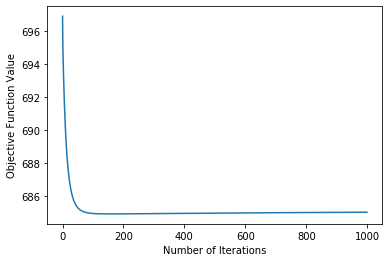

In [156]:
plt.plot(L_vals)
plt.xlabel('Number of Iterations')
plt.ylabel('Objective Function Value')

#### Using the Validation dataset

In [157]:
beta_est_Validation, L_vals_Validation = minimize_grad_L(X_validation,y)

Iteration : 0 | Objective Function Value :  325.6641793872834
Iteration : 1 | Objective Function Value :  324.29048817169996
Iteration : 2 | Objective Function Value :  323.2081268993265
Iteration : 3 | Objective Function Value :  322.3047835668731
Iteration : 4 | Objective Function Value :  321.53160050209647
Iteration : 5 | Objective Function Value :  320.86284222940714
Iteration : 6 | Objective Function Value :  320.28162104874394
Iteration : 7 | Objective Function Value :  319.77514206385086
Iteration : 8 | Objective Function Value :  319.3329849060865
Iteration : 9 | Objective Function Value :  318.946386489928
Iteration : 10 | Objective Function Value :  318.6078772695084
Iteration : 11 | Objective Function Value :  318.31105459064105
Iteration : 12 | Objective Function Value :  318.0504170391883
Iteration : 13 | Objective Function Value :  317.8212316079961
Iteration : 14 | Objective Function Value :  317.6194224700639
Iteration : 15 | Objective Function Value :  317.44147627846

Iteration : 136 | Objective Function Value :  315.9873057006235
Iteration : 137 | Objective Function Value :  315.9873179934074
Iteration : 138 | Objective Function Value :  315.9873307189189
Iteration : 139 | Objective Function Value :  315.9873438553047
Iteration : 140 | Objective Function Value :  315.98735738211985
Iteration : 141 | Objective Function Value :  315.9873712802289
Iteration : 142 | Objective Function Value :  315.9873855317162
Iteration : 143 | Objective Function Value :  315.98740011979794
Iteration : 144 | Objective Function Value :  315.9874150287465
Iteration : 145 | Objective Function Value :  315.9874302438146
Iteration : 146 | Objective Function Value :  315.98744575117115
Iteration : 147 | Objective Function Value :  315.9874615378359
Iteration : 148 | Objective Function Value :  315.98747759162194
Iteration : 149 | Objective Function Value :  315.9874939010838
Iteration : 150 | Objective Function Value :  315.98751045546453
Iteration : 151 | Objective Functio

Iteration : 280 | Objective Function Value :  315.99048533171515
Iteration : 281 | Objective Function Value :  315.9905113042499
Iteration : 282 | Objective Function Value :  315.990537303115
Iteration : 283 | Objective Function Value :  315.99056332802957
Iteration : 284 | Objective Function Value :  315.99058937871183
Iteration : 285 | Objective Function Value :  315.9906154548839
Iteration : 286 | Objective Function Value :  315.9906415562693
Iteration : 287 | Objective Function Value :  315.99066768259286
Iteration : 288 | Objective Function Value :  315.9906938335829
Iteration : 289 | Objective Function Value :  315.9907200089669
Iteration : 290 | Objective Function Value :  315.99074620847796
Iteration : 291 | Objective Function Value :  315.99077243184723
Iteration : 292 | Objective Function Value :  315.9907986788094
Iteration : 293 | Objective Function Value :  315.99082494910084
Iteration : 294 | Objective Function Value :  315.99085124246
Iteration : 295 | Objective Function

Iteration : 420 | Objective Function Value :  315.99427367630636
Iteration : 421 | Objective Function Value :  315.9943012034124
Iteration : 422 | Objective Function Value :  315.99432872956334
Iteration : 423 | Objective Function Value :  315.99435625462655
Iteration : 424 | Objective Function Value :  315.9943837784713
Iteration : 425 | Objective Function Value :  315.99441130096744
Iteration : 426 | Objective Function Value :  315.99443882198517
Iteration : 427 | Objective Function Value :  315.9944663413958
Iteration : 428 | Objective Function Value :  315.9944938590716
Iteration : 429 | Objective Function Value :  315.9945213748843
Iteration : 430 | Objective Function Value :  315.99454888870747
Iteration : 431 | Objective Function Value :  315.99457640041476
Iteration : 432 | Objective Function Value :  315.99460390988173
Iteration : 433 | Objective Function Value :  315.9946314169826
Iteration : 434 | Objective Function Value :  315.99465892159316
Iteration : 435 | Objective Fun

Iteration : 561 | Objective Function Value :  315.99809545736645
Iteration : 562 | Objective Function Value :  315.9981218356753
Iteration : 563 | Objective Function Value :  315.9981482003645
Iteration : 564 | Objective Function Value :  315.99817455138
Iteration : 565 | Objective Function Value :  315.99820088866676
Iteration : 566 | Objective Function Value :  315.9982272121719
Iteration : 567 | Objective Function Value :  315.9982535218416
Iteration : 568 | Objective Function Value :  315.99827981762246
Iteration : 569 | Objective Function Value :  315.99830609946224
Iteration : 570 | Objective Function Value :  315.99833236730893
Iteration : 571 | Objective Function Value :  315.99835862111
Iteration : 572 | Objective Function Value :  315.99838486081484
Iteration : 573 | Objective Function Value :  315.9984110863719
Iteration : 574 | Objective Function Value :  315.9984372977305
Iteration : 575 | Objective Function Value :  315.99846349484005
Iteration : 576 | Objective Function 

Iteration : 696 | Objective Function Value :  316.0015161440199
Iteration : 697 | Objective Function Value :  316.001540327867
Iteration : 698 | Objective Function Value :  316.0015644936796
Iteration : 699 | Objective Function Value :  316.0015886414423
Iteration : 700 | Objective Function Value :  316.0016127711403
Iteration : 701 | Objective Function Value :  316.0016368827593
Iteration : 702 | Objective Function Value :  316.0016609762851
Iteration : 703 | Objective Function Value :  316.0016850517032
Iteration : 704 | Objective Function Value :  316.00170910899976
Iteration : 705 | Objective Function Value :  316.0017331481608
Iteration : 706 | Objective Function Value :  316.0017571691727
Iteration : 707 | Objective Function Value :  316.0017811720229
Iteration : 708 | Objective Function Value :  316.00180515669723
Iteration : 709 | Objective Function Value :  316.001829123183
Iteration : 710 | Objective Function Value :  316.0018530714671
Iteration : 711 | Objective Function Val

Iteration : 832 | Objective Function Value :  316.0046358418113
Iteration : 833 | Objective Function Value :  316.004657504874
Iteration : 834 | Objective Function Value :  316.00467914932716
Iteration : 835 | Objective Function Value :  316.0047007751744
Iteration : 836 | Objective Function Value :  316.00472238242054
Iteration : 837 | Objective Function Value :  316.0047439710696
Iteration : 838 | Objective Function Value :  316.0047655411255
Iteration : 839 | Objective Function Value :  316.0047870925934
Iteration : 840 | Objective Function Value :  316.00480862547715
Iteration : 841 | Objective Function Value :  316.0048301397821
Iteration : 842 | Objective Function Value :  316.0048516355124
Iteration : 843 | Objective Function Value :  316.0048731126731
Iteration : 844 | Objective Function Value :  316.00489457126923
Iteration : 845 | Objective Function Value :  316.0049160113056
Iteration : 846 | Objective Function Value :  316.0049374327872
Iteration : 847 | Objective Function 

Iteration : 959 | Objective Function Value :  316.0072403154189
Iteration : 960 | Objective Function Value :  316.0072596724278
Iteration : 961 | Objective Function Value :  316.0072790118981
Iteration : 962 | Objective Function Value :  316.00729833384094
Iteration : 963 | Objective Function Value :  316.0073176382688
Iteration : 964 | Objective Function Value :  316.0073369251922
Iteration : 965 | Objective Function Value :  316.0073561946242
Iteration : 966 | Objective Function Value :  316.00737544657613
Iteration : 967 | Objective Function Value :  316.0073946810596
Iteration : 968 | Objective Function Value :  316.00741389808627
Iteration : 969 | Objective Function Value :  316.0074330976687
Iteration : 970 | Objective Function Value :  316.00745227981855
Iteration : 971 | Objective Function Value :  316.00747144454783
Iteration : 972 | Objective Function Value :  316.0074905918685
Iteration : 973 | Objective Function Value :  316.00750972179253
Iteration : 974 | Objective Functi

Text(0, 0.5, 'Objective Function Value')

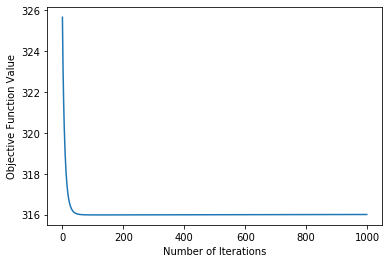

In [158]:
plt.plot(L_vals_Validation)
plt.xlabel('Number of Iterations')
plt.ylabel('Objective Function Value')

## Comments : 

1) A bigger learning rate is more effective, it helps the algorithm in converging much faster. 

2) Standardizing the dataset allowed the values to be calculated, without standardization my values were changing to 'inf' & 'nan' in the prediction function.